In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Get data

In [2]:
df = pd.read_csv('/content/Breast_cancer_dataset.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
df.isnull().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'diagnosis'}>,
        <Axes: title={'center': 'radius_mean'}>,
        <Axes: title={'center': 'texture_mean'}>,
        <Axes: title={'center': 'perimeter_mean'}>,
        <Axes: title={'center': 'area_mean'}>],
       [<Axes: title={'center': 'smoothness_mean'}>,
        <Axes: title={'center': 'compactness_mean'}>,
        <Axes: title={'center': 'concavity_mean'}>,
        <Axes: title={'center': 'concave points_mean'}>,
        <Axes: title={'center': 'symmetry_mean'}>,
        <Axes: title={'center': 'fractal_dimension_mean'}>],
       [<Axes: title={'center': 'radius_se'}>,
        <Axes: title={'center': 'texture_se'}>,
        <Axes: title={'center': 'perimeter_se'}>,
        <Axes: title={'center': 'area_se'}>,
        <Axes: title={'center': 'smoothness_se'}>,
        <Axes: title={'center': 'compactness_se'}>],
       [<Axes: title={'center': 'concavity_se'}>,
        <Axes: title={'center': 'concave p

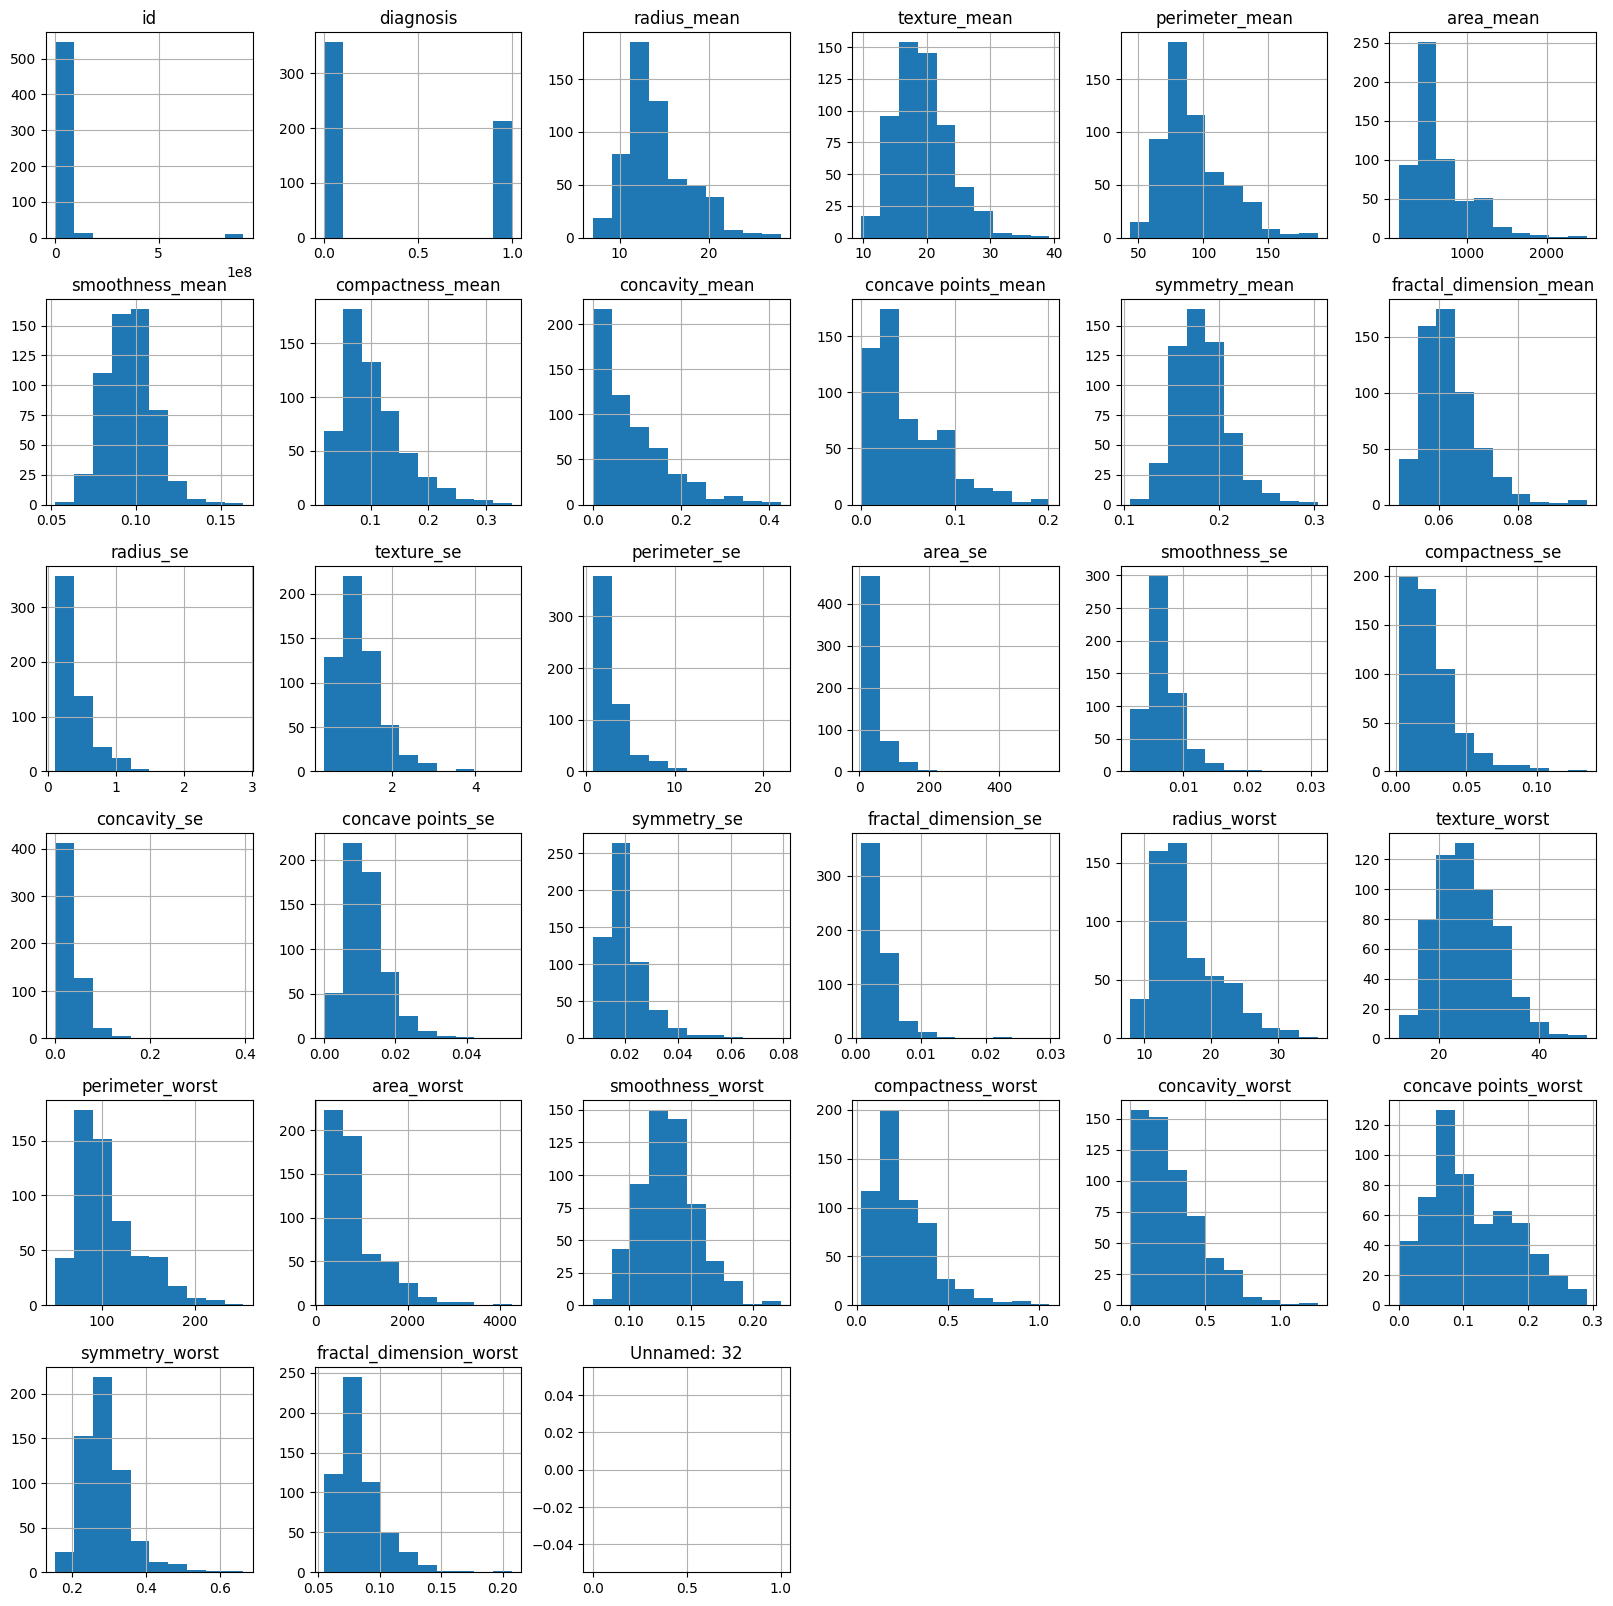

In [7]:
df.hist(figsize=(20, 20))

In [5]:
# encoding categorical data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['diagnosis'] = le.fit_transform(df['diagnosis'])

In [6]:
# separate data X and y
X = df.drop(['diagnosis', 'Unnamed: 32'], axis=1)
y = df['diagnosis']

In [8]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
# feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)


In [10]:
# import and build ANN model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

In [11]:
model = Sequential()

model.add(Dense(units=30, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=15, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1, activation='sigmoid'))

In [12]:
# model compile
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [13]:
# training model and use early stoping
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [14]:
model.fit(x=X_train_scaled, y=y_train, epochs=600, validation_data=(X_test_scaled, y_test), callbacks=[early_stop])

Epoch 1/600
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.4246 - loss: 0.9039 - val_accuracy: 0.4211 - val_loss: 0.6514
Epoch 2/600
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5118 - loss: 0.7302 - val_accuracy: 0.7018 - val_loss: 0.5508
Epoch 3/600
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5808 - loss: 0.6861 - val_accuracy: 0.8509 - val_loss: 0.4825
Epoch 4/600
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6746 - loss: 0.5919 - val_accuracy: 0.9474 - val_loss: 0.4321
Epoch 5/600
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7118 - loss: 0.5441 - val_accuracy: 0.9474 - val_loss: 0.3882
Epoch 6/600
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6965 - loss: 0.5491 - val_accuracy: 0.9649 - val_loss: 0.3478
Epoch 7/600
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8274 - loss: 0.4694 - val_accuracy: 0.9649 - val_loss: 0.3100
Epoch 8/600
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8236 - loss: 0.4665 - val_accuracy: 0.

<Axes: >

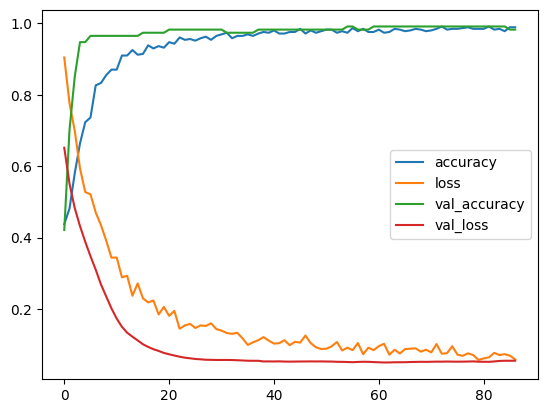

In [15]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [16]:
train_acc = np.array(model_loss['accuracy'])
val_acc = np.array(model_loss['val_accuracy'])

gap = val_acc - train_acc
avg_gap = np.mean(gap)
print(f'mean val_accuracy - accuracy: {avg_gap:.4f}')

mean val_accuracy - accuracy: 0.0330


In [17]:
# model evaluation
prediction = (model.predict(X_test_scaled)>0.5).astype('int32')

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


In [18]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print('accuracy :', round(accuracy_score(y_test, prediction)*100, 2))
print(classification_report(y_test, prediction))
print(confusion_matrix(y_test, prediction))

accuracy : 98.25
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        71
           1       0.98      0.98      0.98        43

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

[[70  1]
 [ 1 42]]
